# FX Trading Data Analysis

## Part 2 - Year 2016

### Introduction

In continuation from [Part 1 - Year 2015](
http://nbviewer.jupyter.org/github/zayedshah/FX-Trading-Data-Analysis/blob/master/Part%201_2015.ipynb)
, I shall carry on here with the analysis for trades from 2016.

We will see that in 2016, my performance was less volatile, I got the sense I was more in control. I didn't get hit by any Black Swan event.

Without further ado, lets get started.

### Getting in Trading Data

Lets import the Python modules as usual.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

I had created separate spreadsheets for different years. Here I am reading in the data from 2016 spreadsheet.

In [2]:
trades_2016 = pd.read_excel('Trades/Trades 2016.xlsx',sheetname='Trades')

Lets use df - short for dataframe, to refer to trades_2016. df is shorter and more convenient to write, rather than writing trades_2016 everytime I need to refer to the trades.

In [3]:
df = trades_2016

Lets take a look at the first few trades. This lets me verify that I have been able to read in the trades successfully.

Looks good so far.

In [4]:
df.head()

,Ticket #,Symbol,Volume,Open,Close,B/S,Sold,Bought,Gross P/L,Rollover,Net P/L,Created By
0,21486534,GBP/JPY,3000,12/14/15 5:59 PM,1/19/16 8:15 AM,S,182.7470,168.75900,248.66,-1.51,247.15,7510123597
1,21486595,GBP/NZD,2000,12/14/15 6:01 PM,1/4/16 3:56 AM,S,2.2330,2.17882,49.73,1.80,51.53,7510123597
2,21533152,AUD/JPY,4000,12/17/15 5:41 PM,1/8/16 1:15 AM,S,87.2030,83.61000,83.12,-4.10,79.02,7510123597
3,21533187,CAD/JPY,4000,12/17/15 5:45 PM,1/19/16 7:03 AM,S,87.9100,81.55200,151.03,-1.26,149.77,7510123597
4,21545894,EUR/NZD,2000,12/18/15 5:33 PM,1/6/16 4:47 PM,S,1.6066,1.62096,-13.04,1.39,-11.65,7510123597


Lets say we want to see how many trades I made in 2016. 

We see that there are 463 records which means I did that many trades in 2016. I think this is much less than the number of trades I did in 2015, which I think was 2120.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
Ticket #      463 non-null int64
Symbol        463 non-null object
Volume        463 non-null int64
Open          463 non-null object
Close         463 non-null object
B/S           463 non-null object
Sold          463 non-null float64
Bought        463 non-null float64
Gross P/L     463 non-null float64
Rollover      463 non-null float64
Net P/L       463 non-null float64
Created By    463 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 43.5+ KB


Lets take care of the column names like Net PnL etc for ease of use as we continue our analysis.

In [6]:
df.rename(columns={'Ticket #':'TicketId',
                   'Gross P/L':'GrossPnL','Net P/L':'NetPnL',
                   'Created By':'Account'},
          inplace=True)

Checking that the column names have been taken care of, it looks good.

In [7]:
df.head()

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
0,21486534,GBP/JPY,3000,12/14/15 5:59 PM,1/19/16 8:15 AM,S,182.7470,168.75900,248.66,-1.51,247.15,7510123597
1,21486595,GBP/NZD,2000,12/14/15 6:01 PM,1/4/16 3:56 AM,S,2.2330,2.17882,49.73,1.80,51.53,7510123597
2,21533152,AUD/JPY,4000,12/17/15 5:41 PM,1/8/16 1:15 AM,S,87.2030,83.61000,83.12,-4.10,79.02,7510123597
3,21533187,CAD/JPY,4000,12/17/15 5:45 PM,1/19/16 7:03 AM,S,87.9100,81.55200,151.03,-1.26,149.77,7510123597
4,21545894,EUR/NZD,2000,12/18/15 5:33 PM,1/6/16 4:47 PM,S,1.6066,1.62096,-13.04,1.39,-11.65,7510123597


In 2016, I was able to avoid jumping around in multiple trading accounts. It was some nightmare in 2015 when I traded using three accounts.

Here we see that I used only one account.

In [8]:
df.Account.unique()

array([7510123597], dtype=int64)

I traded in quite a number of markets. This year, I also made some number of trades in commodities, and stock indices, and even a Bund.

In total, I traded in 53 markets.

In [9]:
df.Symbol.unique()

array(['GBP/JPY', 'GBP/NZD', 'AUD/JPY', 'CAD/JPY', 'EUR/NZD', 'JPN225',
       'EUSTX50', 'USOil', 'XAU/USD', 'NZD/JPY', 'UK100', 'AUD/CAD',
       'EUR/TRY', 'NZD/USD', 'EUR/USD', 'GBP/AUD', 'NZD/CHF', 'NZD/CAD',
       'XPT/USD', 'GBP/CAD', 'USD/CHF', 'USD/SEK', 'XAG/USD', 'NGAS',
       'USD/NOK', 'EUR/CAD', 'USD/CAD', 'GBP/CHF', 'USD/ZAR', 'EUR/JPY',
       'NAS100', 'EUR/GBP', 'CHF/JPY', 'Copper', 'US30', 'XPD/USD',
       'TRY/JPY', 'ZAR/JPY', 'EUR/AUD', 'CAD/CHF', 'AUD/CHF', 'UKOil',
       'GBP/USD', 'USD/TRY', 'EUR/CHF', 'USD/MXN', 'SPX500', 'EUR/NOK',
       'USD/CNH', 'AUD/NZD', 'USD/JPY', 'AUD/USD', 'Bund'], dtype=object)

In [10]:
len(df.Symbol.unique())

53

Looking at the profits and losses for the year, we see that I lost (again) around £1500 this year.

Note that I had to spend around £100 for Rollover. In general, I have seen that this amount does not make any huge dent in the capital.

Comparing to 2015, I lost only about a quarter of the capital I began with in the year. So, I began with around £6000, and lost £1500, that gives me a performance of -25%.

In contrast to 2015, my performance was like -50%. So it looks like I definitely was making a stride in the right direction.

In [11]:
df.agg({'GrossPnL':sum,
       'Rollover':sum,
       'NetPnL':sum})

GrossPnL   -1446.68
Rollover    -101.37
NetPnL     -1548.05
dtype: float64

### Analysis of Distribution of PnLs

Now that we have taken an initial cursory look at the data, and some PnLs, lets dive in further and take a look at the distribution of PnLs by individual trades.

Here our aim is to see how my PnLs were spread out, where did my biggest losses lie, and where were my biggest profits.

We see that this year, I am more stable compared to 2015. There were no losses stretching to £1000. In fact my biggest loss is at around £200. And on the brighter side, my biggest profit seem to be more than my biggest loss. The biggest profit stretched further beyond £200.

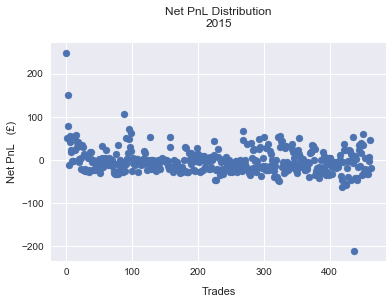

In [12]:
plt.scatter(df.NetPnL.index, df.NetPnL)
plt.title('Net PnL Distribution\n2015', y=1.05)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Trades', labelpad=10)

Like in 2015 analysis, I am using here some alpha (0.5) to see how the distribution looks like, if it gives any further inferences.

We see that most PnLs are around £0, and most of them lie within £100.

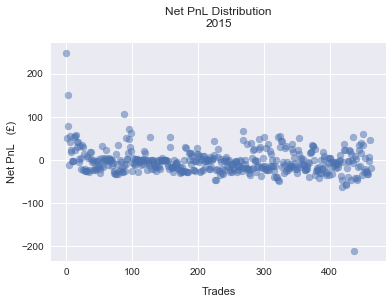

In [13]:
plt.scatter(df.NetPnL.index, df.NetPnL, alpha=0.5)
plt.title('Net PnL Distribution\n2015', y=1.05)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Trades', labelpad=10)

Putting in a Seaborn box plot to see a different flavour of the visualisation.

We see that, like in previous scatter plots, the biggest losses were around £200, and biggest profits stretching slightly more than £200. I find box plots useful to give me a range of my PnLs. Here it's between -£200 to £200.

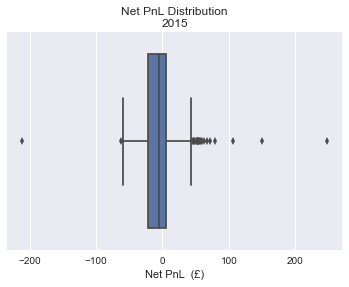

In [14]:
ax = sns.boxplot(df.NetPnL)
ax.set_title('Net PnL Distribution\n2015')
ax.set_xlabel('Net PnL  (£)')             

Bringing in numeric description of PnL distribution, we see, interesting to note, that mean is around -£3 and standard deviation is around £29.

What this tells me is that I have been able to reign in my losses. I was pretty strict on myself this year on using stop losses. And limiting my stop losses to less than 1% or 2% of my capital. I remember increasing my stop losses to 5% or even 10%, on some trades on GBPJPY later during the year, but I still had stop losses. 

One of the main reasons I lost pretty badly in CHF trades in 2015 was because I was not using stop losses. I had been on a winning spree, I began trading in first week of Jan 2015, that week went well, I had been making money, so I upped my risk, and for a few reasons I had convinced myself that I can do without stop losses. This was the frame of mind I was in when one day 15th Jan arrived.

In [15]:
df.NetPnL.describe()

count    463.000000
mean      -3.343521
std       29.293027
min     -210.700000
25%      -21.265000
50%       -5.140000
75%        4.795000
max      247.150000
Name: NetPnL, dtype: float64

### Analysis of PnLs by Individual Trades

Below is a list of trades - top 10, with the biggest losses.

We see that Silver - XAG, won the top spot with loss of -£210. I find some relief in knowing that this is not some £1000 like in 2015.

In [16]:
df.sort_values('NetPnL').head(10).reset_index(drop=True)

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
0,25622098,XAG/USD,300,11/9/16 6:35 AM,11/11/16 3:10 PM,B,17.92700,18.77400,-201.30,-9.40,-210.70,7510123597
1,24867304,CAD/CHF,10000,9/5/16 6:02 PM,9/9/16 2:01 PM,B,0.75010,0.75826,-62.84,0.24,-62.60,7510123597
2,24949855,GBP/AUD,4000,9/13/16 8:06 AM,9/16/16 5:25 PM,B,1.74535,1.77064,-57.96,-1.01,-58.97,7510123597
3,24966843,EUR/JPY,6000,9/14/16 8:14 AM,9/16/16 6:34 AM,B,114.70200,115.96600,-56.15,-0.42,-56.57,7510123597
4,24021874,USD/NOK,3000,6/23/16 11:26 AM,6/24/16 2:08 AM,S,8.16584,8.35897,-49.31,0.00,-49.31,7510123597
5,24891059,XAU/USD,4,9/7/16 11:47 AM,9/9/16 2:31 PM,B,1332.68000,1348.30000,-47.05,-0.12,-47.17,7510123597
6,24021423,AUD/USD,4000,6/23/16 11:02 AM,6/24/16 3:39 AM,B,0.74251,0.75894,-47.17,0.04,-47.13,7510123597
7,25280049,CHF/JPY,6000,10/11/16 7:34 AM,10/12/16 10:57 AM,B,104.66300,105.64100,-46.26,-0.10,-46.36,7510123597
8,22587318,CHF/JPY,3000,3/8/16 6:15 PM,3/10/16 3:09 PM,S,113.03600,115.55300,-46.42,0.09,-46.33,7510123597
9,25767728,Copper,9,11/18/16 10:04 AM,11/21/16 5:47 AM,S,2.46100,2.52430,-46.15,0.00,-46.15,7510123597


Below is a list of the top 10 trades with the biggest profits.

This is a news for some cheer. This year my max profit was more than my max loss. Max loss of £210 and max profit of £247.

I remember this trade with GBPJPY - this is a trade where I was using trailing stop loss. I had initiated the trade towards the end of 2015, but it kept on running into 2016. The trailing stop loss didn't get hit for quite some time. I would move the stop loss everyday. And the profit just piled up.

It made me wonder why didn't I continue to follow the same strategy? This would be a discussion for another day.

In [17]:
df.sort_values('NetPnL', ascending=False).head(10).reset_index(drop=True)

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
0,21486534,GBP/JPY,3000,12/14/15 5:59 PM,1/19/16 8:15 AM,S,182.74700,168.75900,248.66,-1.51,247.15,7510123597
1,21533187,CAD/JPY,4000,12/17/15 5:45 PM,1/19/16 7:03 AM,S,87.91000,81.55200,151.03,-1.26,149.77,7510123597
2,22102106,GBP/JPY,2000,2/4/16 5:34 PM,2/11/16 5:02 PM,S,170.26900,161.64600,106.69,-0.56,106.13,7510123597
3,21533152,AUD/JPY,4000,12/17/15 5:41 PM,1/8/16 1:15 AM,S,87.20300,83.61000,83.12,-4.10,79.02,7510123597
4,22120713,CAD/JPY,3000,2/5/16 6:49 PM,2/11/16 5:07 PM,S,84.15800,80.32000,71.25,-0.43,70.82,7510123597
5,23106696,AUD/CHF,4000,4/13/16 10:07 AM,4/21/16 9:21 AM,B,0.75945,0.73674,65.27,1.23,66.50,7510123597
6,22143077,GBP/JPY,2000,2/8/16 5:10 PM,2/11/16 5:02 PM,S,166.75800,161.65100,63.19,-0.46,62.73,7510123597
7,25864299,AUD/USD,3000,11/28/16 6:27 AM,12/20/16 12:33 PM,S,0.74763,0.72252,61.10,-1.62,59.48,7510123597
8,21654214,NZD/JPY,3000,1/5/16 7:12 PM,1/19/16 7:07 AM,S,79.66200,76.31300,59.59,-2.15,57.44,7510123597
9,24049272,EUR/GBP,2000,6/24/16 11:22 AM,6/27/16 11:18 AM,B,0.83131,0.80299,56.64,-0.08,56.56,7510123597


Below is a graph for the trades - top 10 max profits and top 10 max losses.

We see that only Silver (XAG) dragged the losses down slightly extreme, others were not too bad. On the other hand, the profits look better. The momentum got built up until it peaked at GBPJY.

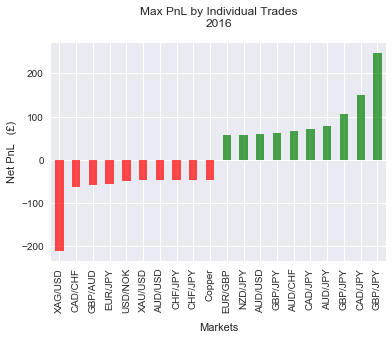

In [18]:
df_ccy_maxPnL = pd.concat([df.sort_values('NetPnL').head(10), df.sort_values('NetPnL').tail(10)])

ax = df_ccy_maxPnL.plot.bar('Symbol','NetPnL',
                      color=np.sign(df_ccy_maxPnL.NetPnL).map({-1:'r', 1:'g'}),
                      legend=False,
                      alpha=0.7)
ax.set_title('Max PnL by Individual Trades\n2016', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Markets', labelpad=10)

Below I plot distribution of PnLs by Markets.

On the negative side, we see XAG. On the positive side, we see GBPJPY. A nice view.

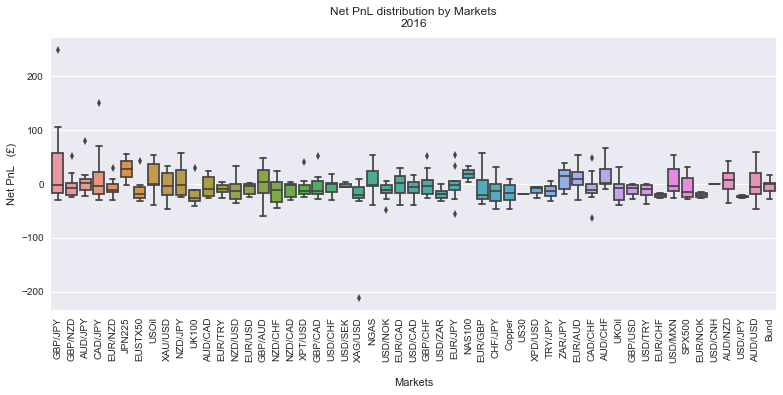

In [19]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.boxplot(data=df, x='Symbol', y='NetPnL', ax=ax)
plt.xticks(rotation=90)
plt.title('Net PnL distribution by Markets\n2016', y=1.02)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Markets', labelpad=15)

### Analysis of Aggregate PnLs by Markets

Below is a list of top 10 markets with the biggest aggregate losses.

Out at top, we see Silver (XAG), followed by Copper.

I was surprised to see Copper running second position, because at the above chart for PnL distribution, Copper doesn't have any negative fat tails, unlike for Silver, where we see clearly. So, below this I will query all trades for Copper.

In [20]:
df_ccyPnL = df.groupby('Symbol', as_index=False)['NetPnL'].sum()
df_ccyPnL.sort_values('NetPnL').head(10).reset_index(drop=True)

,Symbol,NetPnL
0,XAG/USD,-308.47
1,Copper,-207.09
2,UKOil,-152.76
3,USD/NOK,-151.38
4,NZD/CHF,-136.57
5,EUSTX50,-124.59
6,NZD/USD,-124.55
7,USD/CAD,-124.49
8,CHF/JPY,-113.44
9,EUR/USD,-111.91


Querying Copper trades, we see, first of all, that the losses were not big on any one trade. But the losses added up. And we notice that there was not much profits to balance out the losses. Hence Copper was able to edge upto second position, albeit not in the way I would have liked.

In [21]:
df[df.Symbol == 'Copper']

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account
83,22078961,Copper,9,2/3/16 5:51 PM,2/5/16 2:17 PM,B,2.0908,2.0973,-4.04,0.0,-4.04,7510123597
126,22208396,Copper,7,2/10/16 7:44 PM,2/12/16 4:55 PM,S,2.0178,2.0338,-7.74,0.0,-7.74,7510123597
177,22360037,Copper,8,2/22/16 5:49 PM,2/24/16 3:34 AM,B,2.0750,2.1213,-26.48,0.0,-26.48,7510123597
208,22483787,Copper,2,3/1/16 5:32 PM,3/3/16 5:12 PM,B,2.2035,2.1443,8.37,0.0,8.37,7510123597
209,22525041,Copper,2,3/1/16 5:32 PM,3/3/16 7:30 PM,B,2.2088,2.1443,9.10,0.0,9.10,7510123597
213,22524233,Copper,6,3/3/16 4:33 PM,3/3/16 7:30 PM,B,2.2088,2.2040,2.03,0.0,2.03,7510123597
333,24161269,Copper,6,7/4/16 10:07 AM,7/5/16 3:18 PM,B,2.1768,2.2318,-25.25,0.0,-25.25,7510123597
355,24298694,Copper,6,7/14/16 3:57 AM,7/26/16 6:22 AM,B,2.2138,2.2473,-15.32,0.0,-15.32,7510123597
381,24502503,Copper,6,8/1/16 11:10 AM,8/3/16 8:49 AM,B,2.1933,2.2333,-18.01,0.0,-18.01,7510123597
439,25705789,Copper,9,11/15/16 6:44 AM,11/16/16 6:37 AM,S,2.4463,2.5045,-41.96,0.0,-41.96,7510123597


In [22]:
df[df.Symbol == 'Copper']['NetPnL'].sum()

-207.09

I was keen to see how many Copper trades I made - and it turns out not many, just 12 in total for the whole year. I was defintely not over trading in 2016.

In [23]:
len(df[df.Symbol == 'Copper'])

12

Below is a list of top 10 markets with the biggest aggregate profits.

What sticks out are USOil and NGAS. I had made some good bets on Oil and Natural Gas, that turned out right.

In [24]:
df_ccyPnL.sort_values('NetPnL', ascending=False).head(10).reset_index(drop=True)

,Symbol,NetPnL
0,GBP/JPY,398.29
1,CAD/JPY,149.98
2,AUD/CHF,126.44
3,USOil,123.52
4,EUR/AUD,93.54
5,ZAR/JPY,86.24
6,USD/MXN,72.77
7,NZD/JPY,70.50
8,NGAS,68.65
9,AUD/JPY,56.51


Below is a plot with the max PnLs (aggregate) by Markets.

Its nice to see the big jump from GBPJPY. This is the kind of profits that would be ideal. Make big profits but small losses.

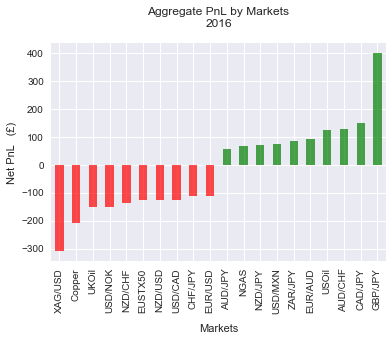

In [25]:
df_ccyPnL_Sum = pd.concat([df_ccyPnL.sort_values('NetPnL').head(10), df_ccyPnL.sort_values('NetPnL').tail(10)])

ax = df_ccyPnL_Sum.plot.bar('Symbol','NetPnL',
                        color=np.sign(df_ccyPnL_Sum.NetPnL).map({-1:'r', 1:'g'}),
                        legend=False,
                        alpha=0.7)
ax.set_title('Aggregate PnL by Markets\n2016', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Markets', labelpad=10)

### Analysis of Monthly PnLs

First lets take a look at the distribution of PnLs by months.

We see that the biggest profits came in Jan - this would be the one from GBPJPY. And the biggest losses came in Nov - I am guessing this would be one from Silver. 

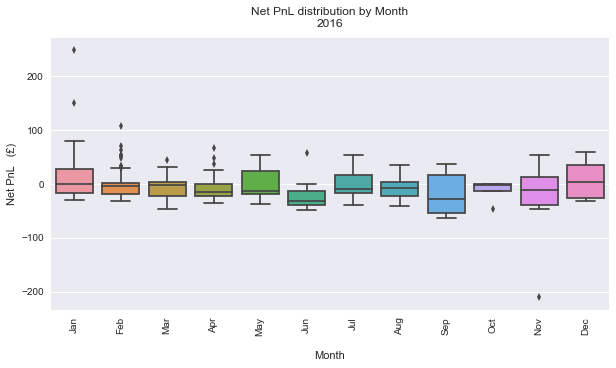

In [26]:
df.Close = pd.to_datetime(df.Close)
df['Month'] = df.Close.map(lambda x: x.strftime('%b'))
df['Month'] = df.Month.astype('category', categories=
                           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='Month', y='NetPnL', ax=ax)
plt.xticks(rotation=90)
plt.title('Net PnL distribution by Month\n2016', y=1.02)
plt.ylabel('Net PnL   (£)')
plt.xlabel('Month', labelpad=15)

Lets see if our guess was correct.

Getting in all trades from November, we see a Silver trade with a loss of -£210. So the negative outlier in Nov was indeed a Silver trade.

In [27]:
df[df.Month == 'Nov']

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account,Month
430,25264775,XAU/USD,1,10/10/16 7:20 AM,2016-11-02 05:27:00,B,1292.52000,1263.86000,23.41,-0.16,23.25,7510123597,Nov
431,25538995,XAU/USD,1,10/10/16 7:20 AM,2016-11-07 05:51:00,B,1290.79000,1263.86000,21.65,-0.21,21.44,7510123597,Nov
432,25589274,XAU/USD,1,10/10/16 7:20 AM,2016-11-08 12:47:00,B,1280.49000,1263.86000,13.42,-0.22,13.20,7510123597,Nov
435,25409853,USD/MXN,2000,10/21/16 9:58 AM,2016-11-02 05:26:00,B,19.31773,18.65956,55.65,-3.06,52.59,7510123597,Nov
436,25538994,USD/MXN,2000,10/21/16 9:58 AM,2016-11-06 22:00:00,B,18.62063,18.65956,-3.36,-4.39,-7.75,7510123597,Nov
437,25622098,XAG/USD,300,11/9/16 6:35 AM,2016-11-11 15:10:00,B,17.92700,18.77400,-201.30,-9.40,-210.70,7510123597,Nov
438,25622114,XAG/USD,300,11/10/16 11:01 PM,2016-11-11 09:43:00,B,18.71600,18.67800,9.02,0.00,9.02,7510123597,Nov
439,25705789,Copper,9,11/15/16 6:44 AM,2016-11-16 06:37:00,S,2.44630,2.50450,-41.96,0.00,-41.96,7510123597,Nov
440,25705800,AUD/JPY,6000,11/15/16 6:47 AM,2016-11-17 06:04:00,B,81.62200,81.61000,0.53,0.57,1.10,7510123597,Nov
441,25726081,Copper,9,11/16/16 6:43 AM,2016-11-22 06:26:00,S,2.50600,2.56380,-41.64,0.00,-41.64,7510123597,Nov


Below, I have aggregated PnLs by months.

I think we could do with some colours. Lets do that next.

In [28]:
df_monthPnL = df.groupby('Month', as_index=False)['NetPnL'].sum()
df_monthPnL

,Month,NetPnL
0,Jan,679.00
1,Feb,-480.78
2,Mar,-528.18
3,Apr,-108.51
4,May,48.17
5,Jun,-212.61
6,Jul,-55.64
7,Aug,-420.37
8,Sep,-204.07
9,Oct,-50.14


Bringing in colours, we see that 9 months were losses and 3 months were profits. This sounds strangely similar to 2015. The main difference being the magnitude of losses - much bigger in 2015.

In [29]:
def colorMap(x):
    return 'color: %s' % ('red' if x < 0 else 'white' if x == 0 else 'green')
    
df_monthPnL.style.applymap(colorMap, subset='NetPnL')

,Month,NetPnL
0,Jan,679
1,Feb,-480.78
2,Mar,-528.18
3,Apr,-108.51
4,May,48.17
5,Jun,-212.61
6,Jul,-55.64
7,Aug,-420.37
8,Sep,-204.07
9,Oct,-50.14


And here we have a plot of PnLs by months.

A better and interesting version is the plot with increasing profits. We will see that next.

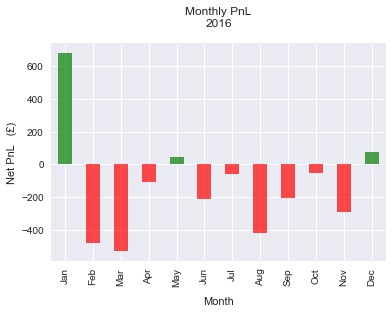

In [30]:
ax = df_monthPnL.plot.bar('Month','NetPnL',
                   color=np.sign(df_monthPnL.NetPnL).map({-1:'r', 1:'g'}),
                   alpha=0.7,
                   legend=False)
ax.set_title('Monthly PnL\n2016', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Month', labelpad=10)

In [31]:
df_monthPnL_sorted = df_monthPnL.sort_values('NetPnL').reset_index(drop=True)

df_monthPnL_sorted.style.applymap(colorMap, subset='NetPnL')

,Month,NetPnL
0,Mar,-528.18
1,Feb,-480.78
2,Aug,-420.37
3,Nov,-292.43
4,Jun,-212.61
5,Sep,-204.07
6,Apr,-108.51
7,Jul,-55.64
8,Oct,-50.14
9,May,48.17


What a glorious view of the profits in Jan. If only, all or many other months were like this.

We also notice that the biggest losses occurred in Mar, slightly more than -£400. This is less than the month with the max profits, ie, in Jan with more than £600 profits.

So one might be tempted to surmise that the tides were turning for my trading on the positive side. Hmm.

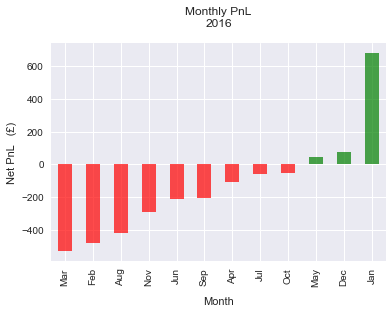

In [32]:
ax = df_monthPnL_sorted.plot.bar('Month','NetPnL',
                   color=np.sign(df_monthPnL_sorted.NetPnL).map({-1:'r', 1:'g'}),
                   alpha=0.7,
                   legend=False)
ax.set_title('Monthly PnL\n2016', position=([0.5, 1.05]))
ax.set_ylabel('Net PnL   (£)')
ax.set_xlabel('Month', labelpad=10)

### Analysis of PnLs by Markets and Months

Time for some pivot tables then.

I bring in the markets with the biggest losses, with a view for how much losses from each month. 

With Silver, its alright - we have seen that it took some big losses in Nov. But I noticed that Copper's losses were also the most in Nov. How come?

So, we ll query Copper trades from Nov, and see what they say next.

In [33]:
df_pt_ccy_month = df.pivot_table(values='NetPnL', index='Symbol', columns='Month', aggfunc=sum,
                      margins=True, margins_name='Total').fillna(0)
df_pt_ccy_month.drop('Total', axis=0, inplace=True)
cols = df_pt_ccy_month.columns

df_ccy_losses = df_pt_ccy_month.sort_values('Total').head(10)
df_ccy_losses.style.applymap(colorMap, subset=cols)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Symbol,,,,,,,,,,,,,
XAG/USD,-24.05,-7.4,-41.95,0,0,0,0,-33.39,0,0,-201.68,0,-308.47
Copper,0,-38.26,19.5,0,0,0,-40.57,-18.01,0,0,-129.75,0,-207.09
UKOil,0,-15.04,-0.87,25.82,0,-39.76,-28.52,-94.39,0,0,0,0,-152.76
USD/NOK,-17.22,-30.84,-13.01,0,0,-49.31,-41,0,0,0,0,0,-151.38
NZD/CHF,10.74,-33.3,-80.7,0,0,0,0,32.33,0,0,0,-65.64,-136.57
EUSTX50,41.12,-54.79,-40.04,0,0,0,-17.98,-52.9,0,0,0,0,-124.59
NZD/USD,41.64,-13.95,-26.46,-53.76,0,0,0,-9.41,0,0,-34.41,-28.2,-124.55
USD/CAD,0,-26.54,23.16,0,0,-39.99,0,-63.55,-17.57,0,0,0,-124.49
CHF/JPY,0,-52.6,-47.58,0,0,0,0,33.1,0,-46.36,0,0,-113.44


Querying Copper trades from November, we see that there were just 3 trades, all losses, but the losses added up to around £120, so that's alright then.

Looks like I was trying to scale a mountain multiple times, and I failed 3 times in a row. It was probably telling me - try something else.

In [34]:
df[(df.Symbol == 'Copper') & (df.Month == 'Nov')]

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account,Month
439,25705789,Copper,9,11/15/16 6:44 AM,2016-11-16 06:37:00,S,2.4463,2.5045,-41.96,0.0,-41.96,7510123597,Nov
441,25726081,Copper,9,11/16/16 6:43 AM,2016-11-22 06:26:00,S,2.5060,2.5638,-41.64,0.0,-41.64,7510123597,Nov
442,25767728,Copper,9,11/18/16 10:04 AM,2016-11-21 05:47:00,S,2.4610,2.5243,-46.15,0.0,-46.15,7510123597,Nov


And lastly but not the least, below is a list of the top 10 markets with the greatest profits, but it also shows how much profits from each month.

We see that a currency pair stands out - ZARJPY, I made some £97 from it in December. Looks like I found some rare opportunity to sneak in some profits before the year ended.

In [35]:
df_ccy_profits = df_pt_ccy_month.sort_values('Total', ascending=False).head(10)
df_ccy_profits.style.applymap(colorMap, subset=cols)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Symbol,,,,,,,,,,,,,
GBP/JPY,247.15,156.74,-14.97,0,-19.57,0,28.94,0,0,0,0,0,398.29
CAD/JPY,173.79,29.74,-29.96,0,0,0,-23.59,0,0,0,0,0,149.98
AUD/CHF,0,-9.07,0,103.63,0,0,28.41,3.47,0,0,0,0,126.44
USOil,191.63,-11.73,-1.31,0,0,-38.86,-0.57,-15.64,0,0,0,0,123.52
EUR/AUD,0,-2.04,23.85,0,0,0,102.53,-30.8,0,0,0,0,93.54
ZAR/JPY,0,-7.37,0,0,0,0,10.37,-14.51,0,0,0,97.75,86.24
USD/MXN,0,-4.1,18.58,-17.52,85.36,-40.73,-13.66,0,0,0,44.84,0,72.77
NZD/JPY,92.64,43.98,-47.11,0,-19.01,0,0,0,0,0,0,0,70.5
NGAS,-4.95,53.16,0,0,0,0,-39.27,-16.22,77.62,-1.69,0,0,68.65


Lastly, lets take a look at the currency pair that gave the most profits - GBPJPY.

One trade in Jan made good profit, in Feb I made few more profitable trades, and there was one more profitable trade in July. In total, it generated around £400 profits.

In [36]:
df[df.Symbol == 'GBP/JPY'].style.applymap(colorMap, subset='NetPnL')

,TicketId,Symbol,Volume,Open,Close,B/S,Sold,Bought,GrossPnL,Rollover,NetPnL,Account,Month
0,21486534,GBP/JPY,3000,12/14/15 5:59 PM,2016-01-19 08:15:00,S,182.747,168.759,248.66,-1.51,247.15,7510123597,Jan
72,22037844,GBP/JPY,2000,2/1/16 6:42 PM,2016-02-03 15:28:00,B,171.715,174.362,-30.83,0.04,-30.79,7510123597,Feb
87,22102106,GBP/JPY,2000,2/4/16 5:34 PM,2016-02-11 17:02:00,S,170.269,161.646,106.69,-0.56,106.13,7510123597,Feb
98,22143077,GBP/JPY,2000,2/8/16 5:10 PM,2016-02-11 17:02:00,S,166.758,161.651,63.19,-0.46,62.73,7510123597,Feb
133,22231815,GBP/JPY,1000,2/11/16 5:02 PM,2016-02-12 17:02:00,S,161.636,163.413,-10.87,-0.02,-10.89,7510123597,Feb
158,22288900,GBP/JPY,1000,2/16/16 7:57 PM,2016-02-25 23:52:00,S,162.678,157.963,29.85,-0.29,29.56,7510123597,Feb
243,22703916,GBP/JPY,1000,3/15/16 7:02 PM,2016-03-16 17:12:00,S,160.124,160.36,-1.47,-0.03,-1.5,7510123597,Mar
244,22719655,GBP/JPY,1000,3/15/16 7:02 PM,2016-03-29 17:49:00,S,160.124,162.242,-13.05,-0.42,-13.47,7510123597,Mar
297,23348974,GBP/JPY,1000,4/29/16 5:40 PM,2016-05-18 14:13:00,S,156.419,159.493,-19.27,-0.3,-19.57,7510123597,May
353,24262059,GBP/JPY,1000,7/12/16 8:08 AM,2016-07-15 04:18:00,B,142.781,135.44,51.41,0.08,51.49,7510123597,Jul
